# **PRESENTED BY**: **JAYAKRISHNAN J**

**DATE:09/04/2024**

**Predicting Hepatitis C Patients**

Outline:

 1.Data Preprocessing: Data cleaning, simple EDA, data scalling

2.Model Building: Logistic Regression, Random Forest, Support Vector Machine

3.Model Evaluation: Accuracy, AUC-ROC, AUC-PRC.




**Background**

Hepatitis C is a viral infection specifically targeting the liver, potentially leading to severe and life-threatening liver damage if left untreated. This bloodborne virus, primarily transmitted through exposure to infected blood, can establish a chronic infection that may persist for years. In its chronic form, hepatitis C can quietly progress, often without noticeable symptoms, making early detection crucial for effective management.

Diagnostic tools, such as liver function tests, play a pivotal role in assessing the health of the liver. These blood tests evaluate the levels of various enzymes and proteins, providing insights into the liver's performance in tasks like protein production and bilirubin clearance. Elevated levels of certain enzymes may indicate liver cell damage or disease, helping healthcare professionals monitor and address the progression of hepatitis C and its impact on liver function. Regular monitoring and timely intervention are essential components of managing hepatitis C to prevent long-term complications.



**Some important terminologies for this dataset:**

Alanine transaminase (ALT): ALT is a liver enzyme responsible for converting proteins into energy, and elevated levels in the bloodstream may indicate liver damage or disease.

Aspartate transaminase (AST): AST, also found in the liver, assists in amino acid metabolism; increased levels could signify liver damage, disease, or muscle injury.

Alkaline phosphatase (ALP): ALP, present in the liver and bone, aids in protein breakdown, and elevated levels may suggest liver damage, bile duct obstruction, or certain bone diseases.

Albumin (ALB) and Total Protein: Albumin, produced in the liver, is vital for immune function, and lower-than-normal levels may indicate liver damage or disease.

Bilirubin: Bilirubin, a byproduct of red blood cell breakdown, passes through the liver, and elevated levels could signal liver damage, disease, or certain types of anemia.

Gamma-glutamyltransferase (GGT): GGT is a blood enzyme, and higher-than-normal levels may indicate liver or bile duct damage.

Acetylcholinesterase (AChE) is an enzyme pivotal in nerve signal transmission, breaking down acetylcholine and contributing to neuromuscular function.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df=pd.read_csv('/content/HepatitisCdata.csv')

In [3]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


**DATA CLEANING**

In [5]:

df.drop('Unnamed: 0', axis=1,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [7]:
print(df['Category'].unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [8]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [9]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)

In [10]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [11]:
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

**Exploratory Data Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

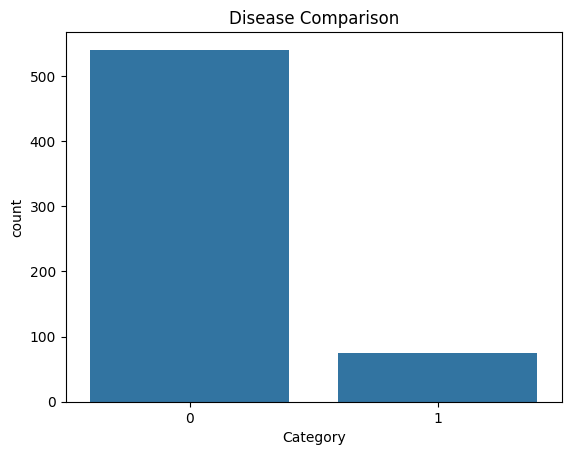

In [12]:
#check disease distribution

plt.figure()
sns.countplot(x='Category', data=df)
plt.title('Disease Comparison')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

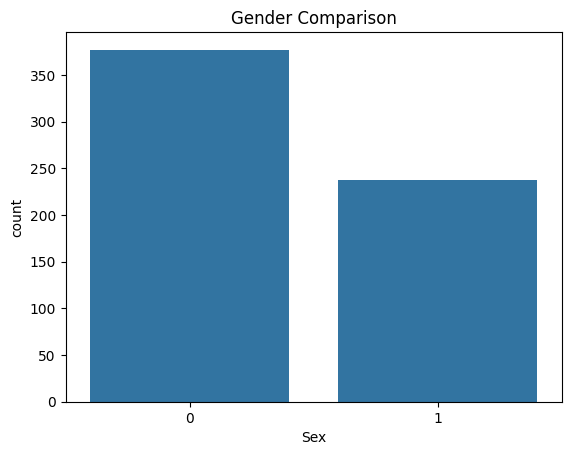

In [13]:
plt.figure()
sns.countplot(x='Sex', data=df)
plt.title('Gender Comparison')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

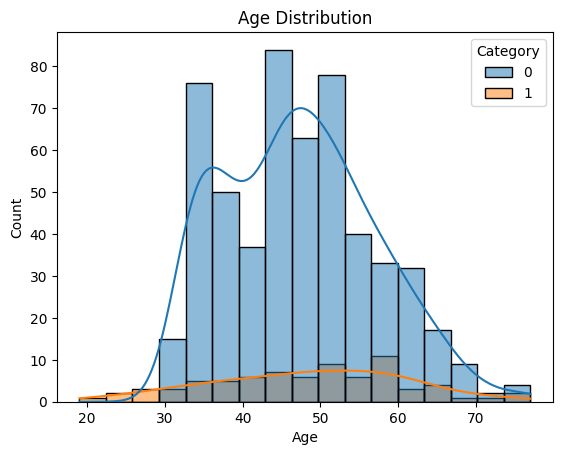

In [14]:
plt.figure()
sns.histplot(data=df, x='Age', hue='Category', kde=True)
plt.title('Age Distribution')
plt.show

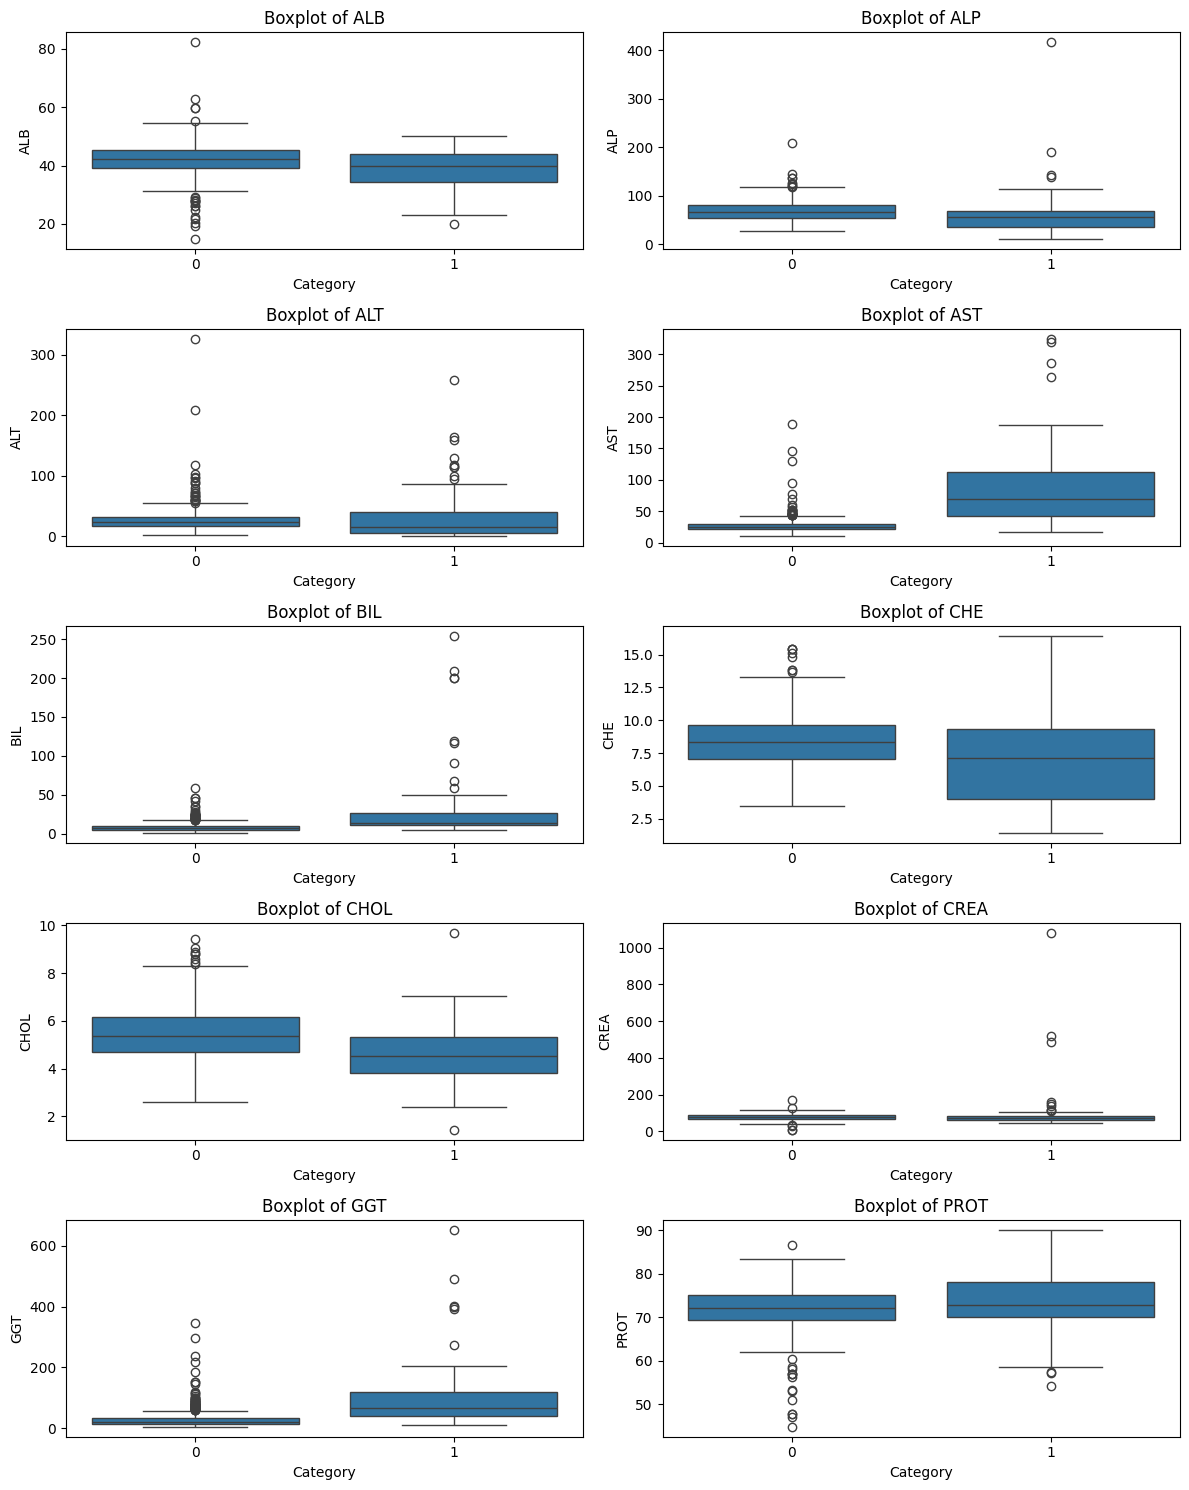

In [15]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
axes = axes.flatten()

columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for i, column in enumerate(columns):
    sns.boxplot(x=df['Category'], y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

<Axes: >

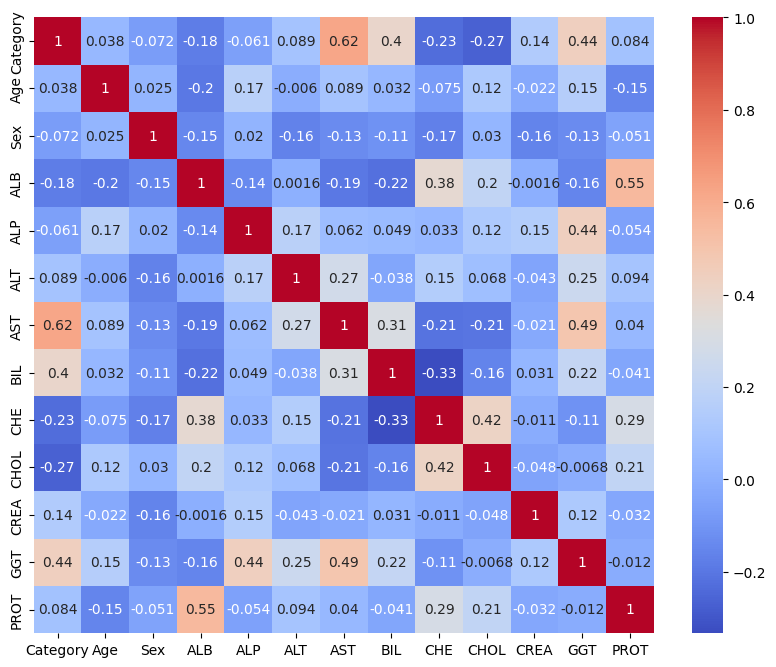

In [16]:


fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap='coolwarm')

In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
scaled_data = scalar.fit_transform(df[cols_to_scale])
df_scaled = pd.DataFrame(scaled_data, columns=cols_to_scale)
df[cols_to_scale] = df_scaled

In [18]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,-0.540647,-0.616004,-0.816054,-0.383693,-0.198236,-0.574734,-1.904676,0.497070,-0.502286,-0.564372
1,0,32,0,-0.540647,0.078682,-0.410992,-0.305057,-0.381375,1.349161,-0.506078,-0.146590,-0.438203,0.826102
2,0,32,0,0.914850,0.250402,0.304747,0.538767,-0.269457,0.291926,-0.149747,0.094783,-0.115957,1.345212
3,0,32,0,0.273738,-0.635517,0.084520,-0.368571,0.381706,-0.393234,-0.559528,-0.025903,-0.104971,0.677784
4,0,32,0,-0.419356,0.226986,0.163172,-0.302033,-0.091404,0.432588,-0.933675,-0.106361,-0.176378,-0.619991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,-1.666925,13.593832,-0.886841,2.283879,1.963828,-1.191832,0.830162,-0.514683,11.193789,-0.657071
611,1,64,1,-3.053113,1.347069,-1.004820,0.290761,0.437665,-3.020439,-2.091750,-0.367848,-0.066521,-0.137960
612,1,64,1,-2.186746,0.742146,-0.981225,1.942115,1.862083,-2.965989,-1.548345,-0.293425,0.451636,1.845783
613,1,46,1,-1.493652,0.000000,0.414861,0.823066,0.437665,-2.103866,-1.040574,-0.589106,0.191642,-0.193579


In [19]:
from sklearn.model_selection import train_test_split
x = df.drop("Category", axis=1)
y = df["Category"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
x_train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
296,64,0,0.498994,0.761660,-0.525039,-0.350424,0.045950,0.586863,2.077320,-0.066132,-0.357642,0.418229
554,44,0,1.278725,-1.599491,0.462053,-0.111492,0.081561,0.323689,-1.156382,0.004268,-0.218490,0.140134
443,49,1,-1.164432,-1.185802,-0.517174,-0.465353,-0.218584,-1.314344,0.456015,0.034440,-0.579186,-1.769450
301,65,0,-0.436683,-0.877486,-0.210428,-0.220372,-0.254195,-0.542971,0.767804,-0.166704,-0.227644,-1.435736
247,55,0,1.036142,0.141126,-0.104247,-0.311106,-0.284718,0.473426,-0.657519,0.034440,-0.191026,0.863181
...,...,...,...,...,...,...,...,...,...,...,...,...
71,38,0,-0.298064,-0.210120,1.700833,0.275639,-0.050707,1.226649,1.462649,0.356270,0.892894,0.195753
106,41,0,0.533649,0.258208,-0.127843,-0.441158,-0.259282,0.972549,-1.013849,-0.146590,-0.289897,0.010357
270,59,0,-0.315392,-0.736988,-0.119977,-0.404864,0.676764,-0.316097,-1.494896,0.094783,-0.381444,-0.026722
435,48,1,0.481667,-0.616004,-0.473915,-0.344375,-0.350852,0.391751,1.257759,-0.146590,-0.535243,0.195753


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=knn.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8810810810810811

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [24]:
lr_model = LogisticRegression()
lr_params = {
    "penalty": ["l2"],
    "C": [0.01, 0.1, 1, 10],
    "max_iter": [500]
}

grid_search_lr = GridSearchCV(lr_model, lr_params, scoring='accuracy', cv=5)
grid_search_lr.fit(x_train, y_train)

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression")
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Accuracy: {accuracy_lr}")

Logistic Regression
Best parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
Accuracy: 0.9027027027027027


In [25]:
#Training using best hyperparameter

lr_model = LogisticRegression(C=10, penalty='l2', max_iter=500)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
y_pred1_lr =lr_model.predict(x_train)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression")
print(f"Best Model Accuracy: {accuracy_lr:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_lr)
print("Best Model Classification Report:")
print(classification_rep_lr)

Logistic Regression
Best Model Accuracy: 0.914
Best Model Confusion Matrix:
[[154   2]
 [ 14  15]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       156
           1       0.88      0.52      0.65        29

    accuracy                           0.91       185
   macro avg       0.90      0.75      0.80       185
weighted avg       0.91      0.91      0.90       185



In [26]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model = RandomForestClassifier()
rfc_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None]
}

grid_search_rfc = GridSearchCV(rfc_model, rfc_params, scoring='accuracy', cv=5)
grid_search_rfc.fit(x_train, y_train)

best_rfc_model = grid_search_rfc.best_estimator_
y_pred_rfc = best_rfc_model.predict(x_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print("Random Forest")
print(f"Best parameters: {grid_search_rfc.best_params_}")
print(f"Accuracy: {accuracy_rfc}")

In [ ]:
rfc_model = RandomForestClassifier(max_depth=20, n_estimators=200)
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
y_pred1_rfc = rfc_model.predict(x_train)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

print("Random Forest")
print(f"Best Model Accuracy: {accuracy_rfc:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_rfc)
print("Best Model Classification Report:")
print(classification_rep_rfc)

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_params = {
    "C": [0.01, 0.1, 1, 10],
    "kernel": ["linear", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}

grid_search_svc = GridSearchCV(svc_model, svc_params, scoring='accuracy', cv=5)
grid_search_svc.fit(x_train, y_train)

best_svc_model = grid_search_svc.best_estimator_
y_pred_svc = best_svc_model.predict(x_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Support Vector Machine")
print(f"Best parameters: {grid_search_svc.best_params_}")
print(f"Accuracy: {accuracy_svc}")

In [ ]:
svc_model = SVC(C=10, gamma='scale', kernel='linear')
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)

print("Support Vector Machine")
print(f"Best Model Accuracy: {accuracy_svc:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_svc)
print("Best Model Classification Report:")
print(classification_rep_svc)

In [ ]:
x = ['Logistic Regression',
     'Random Forest',
     'Support Vector Machine']

y = [accuracy_lr,
     accuracy_rfc,
     accuracy_svc]

fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=x,y=y, palette='coolwarm')
plt.ylabel("Model Accuracy")
plt.xticks(rotation=20)
plt.title("Model Accuracy Comparison")

for i, v in enumerate(y):
    ax.text(i, v + 0.01, f'{v*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

y_scores_lr = best_lr_model.decision_function(x_test)
y_scores_rfc = best_rfc_model.predict_proba(x_test)[:, 1]
y_scores_svc = best_svc_model.decision_function(x_test)

models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
scores = [y_scores_lr, y_scores_rfc, y_scores_svc]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Change the subplot layout here

for i, model in enumerate(models):
    # Calculate AUC for ROC
    auc_roc = roc_auc_score(y_test, scores[i])
    fpr, tpr, _ = roc_curve(y_test, scores[i])

    # Plot ROC curve
    axes[i].plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')

    # Calculate AUC for Precision-Recall Curve
    auc_prc = average_precision_score(y_test, scores[i])
    precision, recall, _ = precision_recall_curve(y_test, scores[i])

    # Plot Precision-Recall Curve
    axes[i].plot(recall, precision, label=f'AUC-PRC = {auc_prc:.2f}')

    axes[i].set_title(model)
    axes[i].legend()

plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
#overfitting for logistic regression model
rep = classification_report(y_train, y_pred1_lr)
print ("Report of train data:")
print(rep)

print("-----------------------------------------------------------")

rep = classification_report(y_test, y_pred_lr)
print ("Report of test data:")
print(rep)

In [ ]:
rep = classification_report(y_train,y_pred1_rfc)
print ("Report of train data:")
print(rep)

print("-----------------------------------------------------------")

rep = classification_report(y_test, y_pred_rfc)
print ("Report of test data:")
print(rep)